# Import neccessary Library

In [39]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [40]:
df = pd.read_csv("/content/bollywood_data_set.csv")
df.head()

,Unnamed: 0,imdb-id,movie_name,year_of_release,runtime,IMDB_rating,no_of_votes,plot_description,director,actors
0,0,tt10811166,The Kashmir Files,(2022),170 min,8.3,"548,031","The Kashmir Files' is a story, based on video ...",Vivek Agnihotri,"Vivek Agnihotri| Mithun Chakraborty, A..."
1,1,tt1187043,3 Idiots,(2009),170 min,8.4,"387,020",Two friends are searching for their long lost ...,Rajkumar Hirani,"Rajkumar Hirani| Aamir Khan, Madhavan,..."
2,2,tt0986264,Taare Zameen Par,(2007),165 min,8.3,"188,938",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Aamir Khan, Amole Gupte| Darsheel Safa..."
3,3,tt5074352,Dangal,(2016),161 min,8.3,"183,452",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Nitesh Tiwari| Aamir Khan, Sakshi Tanw..."
4,4,tt2338151,PK,(2014),153 min,8.1,"180,108",An alien on Earth loses the only device he can...,Rajkumar Hirani,"Rajkumar Hirani| Aamir Khan, Anushka S..."


In [41]:
df =  df[['imdb-id','movie_name','IMDB_rating', 'plot_description']]

In [42]:
df.head()

,imdb-id,movie_name,IMDB_rating,plot_description
0,tt10811166,The Kashmir Files,8.3,"The Kashmir Files' is a story, based on video ..."
1,tt1187043,3 Idiots,8.4,Two friends are searching for their long lost ...
2,tt0986264,Taare Zameen Par,8.3,An eight-year-old boy is thought to be a lazy ...
3,tt5074352,Dangal,8.3,Former wrestler Mahavir Singh Phogat and his t...
4,tt2338151,PK,8.1,An alien on Earth loses the only device he can...


# Data Preprocessing

In [43]:
df.isnull().sum()

,0
imdb-id,0
movie_name,0
IMDB_rating,0
plot_description,0


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Transform the metadata column
tfidf_matrix = tfidf.fit_transform(df['movie_name'])
print(tfidf_matrix.shape)  # (Number of movies, Number of unique words)


(9999, 7898)


In [45]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [46]:
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Check the shape of the similarity matrix
print("Cosine Similarity Matrix Shape:", cosine_sim.shape)  # (Number of movies, Number of movies)

Cosine Similarity Matrix Shape: (9999, 9999)


In [47]:
# Reverse mapping of movie titles to indices
indices = pd.Series(df.index, index=df['movie_name']).drop_duplicates()


# Data Analysis

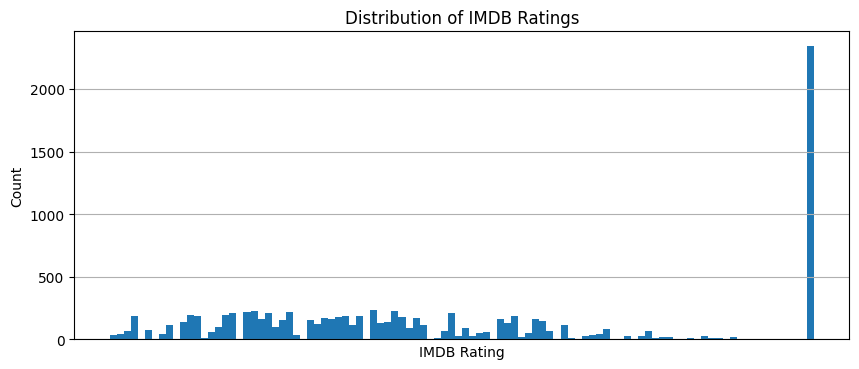

In [55]:
plt.figure(figsize = (10,4))
df['IMDB_rating'].hist(bins = 100)
plt.xticks([])
plt.xlabel('IMDB Rating')
plt.ylabel('Count')
plt.title('Distribution of IMDB Ratings')
plt.show()


# Create the Recommendation System

In [48]:
def recommend_movies(title, num_recommendations=5):
    """
    Recommend movies similar to the given title.

    Parameters:
        title (str): The title of the movie to base recommendations on.
        num_recommendations (int): Number of recommendations to return.

    Returns:
        list: Titles of recommended movies.
    """

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top movies (excluding itself)
    sim_scores = sim_scores[1:num_recommendations + 1]
    movie_indices = [i[0] for i in sim_scores]

    # Return the top recommended movie titles
    return df['movie_name'].iloc[movie_indices]


In [58]:
# Test the recommender system
movie_title = "3 Idiots"
recommendations = recommend_movies(movie_title, num_recommendations=3)

print(f"Recommendations for '{movie_title}':")
for i, rec in enumerate(recommendations, start=1):
    print(f"{i}. {rec}")


Recommendations for '3 Idiots':
1. The Kashmir Files
2. Taare Zameen Par
3. Dangal
